In [3]:
#step 1: import lib
import pandas as pd

# Load dataset
df = pd.read_csv("sales_data_sample.csv", encoding='latin-1')  # Update with your filename
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [ ]:
#Step 2: Perform Descriptive Statistics

# Summary statistics for numerical columns
df.describe()

# Mode for each column
df.mode().iloc[0]

In [7]:
#Step 3: Perform Hypothesis Testing (ANOVA for Sales by Country)

import scipy.stats as stats

# Get the sales data for each country
country_sales = [df['SALES'][df['COUNTRY'] == country].dropna() for country in df['COUNTRY'].unique()]

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(*country_sales)

print("ANOVA F-statistic:", f_statistic)
print("ANOVA P-value:", p_value)

# Interpret the results (typical alpha is 0.05)
alpha = 0.05
if p_value < alpha:
    print(f"\nSince the P-value ({p_value:.4f}) is less than the significance level ({alpha}), we reject the null hypothesis.")
    print("Conclusion: There is a significant difference in average sales across different countries.")
else:
    print(f"\nSince the P-value ({p_value:.4f}) is greater than or equal to the significance level ({alpha}), we fail to reject the null hypothesis.")
    print("Conclusion: There is no significant difference in average sales across different countries.")

ANOVA F-statistic: 0.7389884906785259
ANOVA P-value: 0.7729502139369222

Since the P-value (0.7730) is greater than or equal to the significance level (0.05), we fail to reject the null hypothesis.
Conclusion: There is no significant difference in average sales across different countries.


In [8]:
#step 4: Perform Chi-square Test (STATUS vs DEALSIZE)

from scipy.stats import chi2_contingency
import pandas as pd

# Create a contingency table of the two categorical columns
contingency_table = pd.crosstab(df['STATUS'], df['DEALSIZE'])

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2)
print("P-value:", p)

# Interpret the results (typical alpha is 0.05)
alpha = 0.05
if p < alpha:
    print(f"\nSince the P-value ({p:.4f}) is less than the significance level ({alpha}), we reject the null hypothesis.")
    print("Conclusion: There is a significant relationship between order status and deal size.")
else:
    print(f"\nSince the P-value ({p:.4f}) is greater than or equal to the significance level ({alpha}), we fail to reject the null hypothesis.")
    print("Conclusion: There is no significant relationship between order status and deal size.")

Chi-square Statistic: 34.344354882679596
P-value: 0.0001614574648411617

Since the P-value (0.0002) is less than the significance level (0.05), we reject the null hypothesis.
Conclusion: There is a significant relationship between order status and deal size.


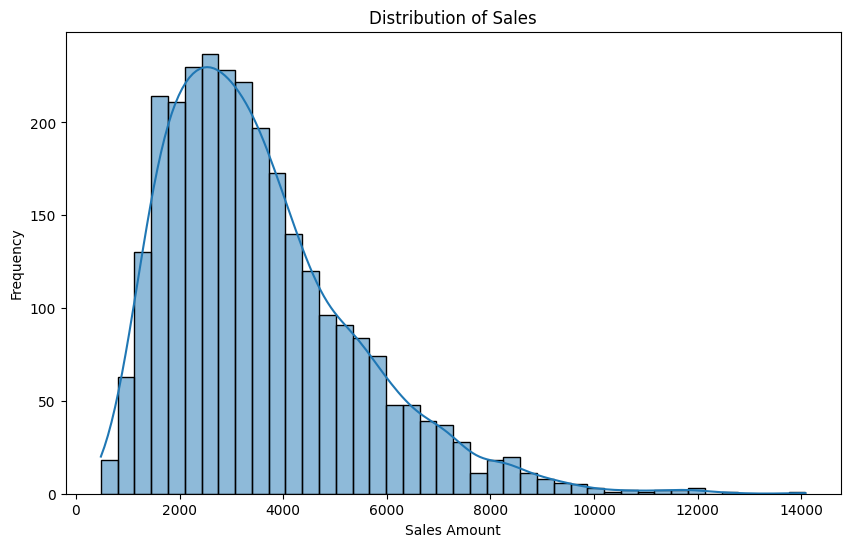

In [9]:
# Step 5: Visualizations (Histogram of Sales)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['SALES'], kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.show()

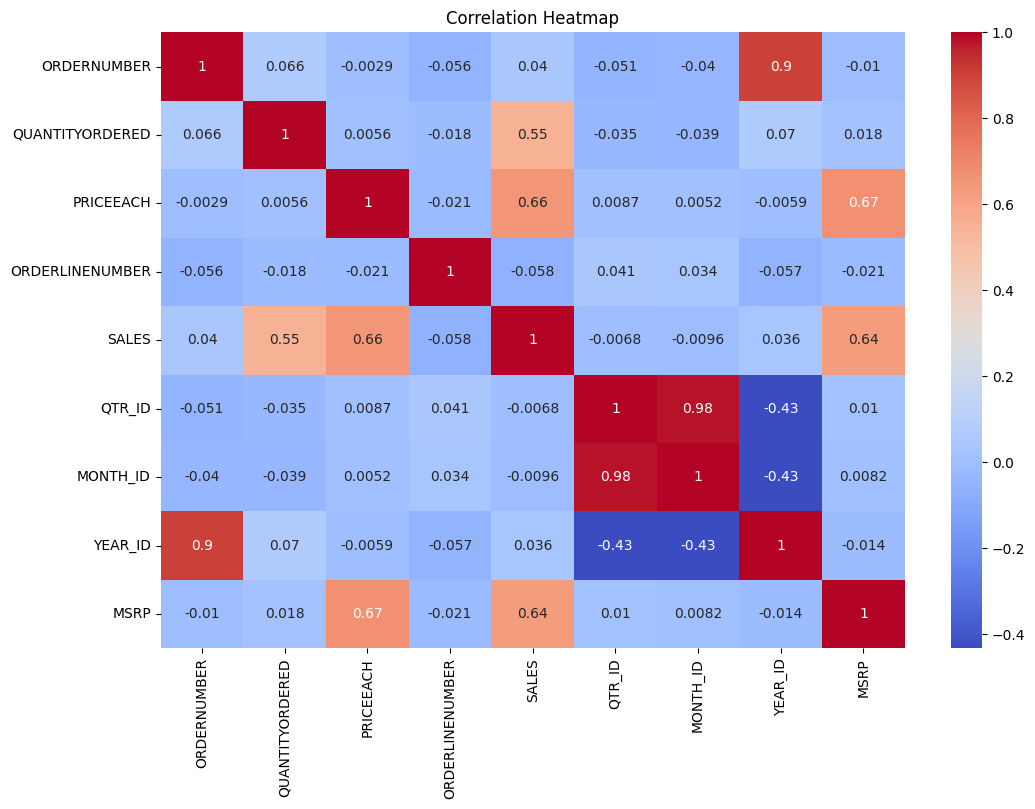

In [12]:
# Step 6 (Bonus): Correlation Analysis & Pivot Table
# Heatmap

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [13]:
# Create a pivot table of average sales by country and deal size
pivot_table_sales = pd.pivot_table(df, values='SALES', index='COUNTRY', columns='DEALSIZE', aggfunc='mean')

# Display the pivot table
display(pivot_table_sales)

DEALSIZE,Large,Medium,Small
COUNTRY,,,
Australia,8607.434286,4433.081395,2055.718043
Austria,8198.020000,4321.175862,1998.015909
Belgium,NaN,4768.758000,2048.958333
Canada,9064.890000,4164.560000,2155.088611
Denmark,8314.445000,4517.764516,2142.299231
Finland,8002.464000,4385.694783,2142.137317
France,8524.041429,4319.504832,2002.121042
Germany,7624.015000,4438.393000,2029.437143
Ireland,7719.720000,4470.478333,1936.765000
